# Mean Force Integration in 1D

Import HILLS and COLVAR files, compute the mean force and integrate using the pyMFI (would be) module. 

100.0%   OFE = 1.1973


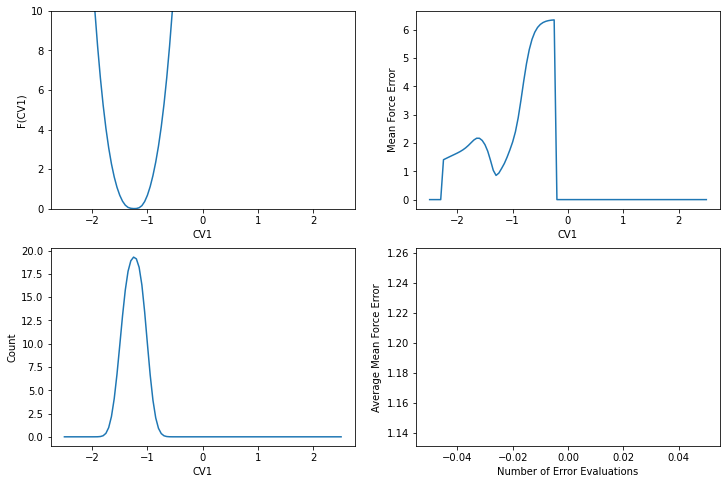

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI1D

#Read the HILLS file
HILLS=MFI1D.load_HILLS(hills_name="HILLS")

#Read the Colvar File
position = MFI1D.load_position(position_name="position")

#Compute the time-independent mean force
[X, Ftot_den, Ftot, ofe_map, ofe_history] = MFI1D.MFI_1D(HILLS = HILLS, position = position, bw = 0.1, kT = 1, log_pace = 1, error_pace = 1, min_grid=-2.5, max_grid=2.5, WellTempered=0)

# Integrate Ftot, obtain FES 
FES = MFI1D.intg_1D(X,Ftot)

# Plot Recap
MFI1D.plot_recap(X, FES, Ftot_den, ofe_map, ofe_history,lim=10)
